# Algoritmos de Clasificacion 

In [1]:
#Import

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math

from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier


print('¡Librerías importadas con éxito!')

¡Librerías importadas con éxito!


In [2]:
#Abrimos los archivos con el Train set
train = pd.read_csv('trainset.csv')
train = train.set_index('id')
train.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
146790,2.217079,0.0,139.731754,0.869118,0.519249,0.029225,0.319573,0.002967,0.091678,0.188732,26.457350,34.0,2
142735,4.304625,0.0,140.968235,1.910310,0.769341,0.067253,0.023262,0.000000,0.052209,0.663667,23.141670,2.0,1
971,4.304625,1.0,109.520199,0.977668,0.253525,0.026992,0.364818,0.001985,0.074177,0.444230,29.855429,62.0,4
61341,3.828397,1.0,75.954996,1.509001,0.931646,0.106186,0.139922,0.000000,0.120665,0.491329,31.462427,19.0,1
153359,3.828397,1.0,91.244236,1.555391,0.545826,0.035371,0.251469,0.149262,0.083623,0.272233,34.090480,43.0,3


In [3]:
train.shape

(55543, 13)

In [4]:
#Verificamos que no hay valores nulos 
train.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
popularity          0
ClasePopularidad    0
dtype: int64

In [5]:
#Abrimos los archivos con el Test set
test = pd.read_csv('testset.csv')
test = test.set_index('id')
test.head()

,t_key0,t_mode0,t_dur0,t_dance0,t_energy0,t_speech0,t_acous0,t_ins0,t_live0,t_val0,t_tempo0,popularity,ClasePopularidad
id,,,,,,,,,,,,,
116295,3.873489,1.0,102.077434,1.136005,0.652068,0.038806,0.245297,0.000004,0.061371,0.313870,20.325737,56.0,3
101223,1.595405,1.0,163.222452,1.559666,1.375892,0.090603,0.000999,0.144474,0.079899,0.237952,32.519312,22.0,2
47928,4.359420,1.0,113.531853,1.593801,1.504156,0.052763,0.030623,0.005559,0.070192,0.776168,26.369467,22.0,2
88722,3.873489,1.0,96.792061,1.289259,1.595320,0.048714,0.151174,0.000000,0.034878,0.862629,32.618254,50.0,3
111363,4.359420,0.0,102.640817,1.814995,1.031562,0.036711,0.015053,0.000002,0.089617,0.838169,25.157347,35.0,2


In [6]:
test.shape

(13920, 13)

In [7]:
#Verificamos que no hay valores nulos 
test.isnull().sum()

t_key0              0
t_mode0             0
t_dur0              0
t_dance0            0
t_energy0           0
t_speech0           0
t_acous0            0
t_ins0              0
t_live0             0
t_val0              0
t_tempo0            0
popularity          0
ClasePopularidad    0
dtype: int64

**Entrenamiento como Problema de Clasificacion**

En este caso nuestro target es la variable creada **ClasePopularidad** que tiene los 5 niveles de popularidad definidos (ver Notebook de Limpieza de Datos).

Veamos la proporcion de cada clase, para ver que tan desbalanceada esta la variable target


In [8]:
train['ClasePopularidad'].value_counts(normalize = True)

2    0.358173
1    0.319950
3    0.254956
4    0.065445
5    0.001476
Name: ClasePopularidad, dtype: float64

Vemos que las clases 1,2 y 3 resultan en el 92% de todos los datos, mientras que las clases 4 y 5 estan reducidas al 8%. Por lo que los datos estan muy desbalanceados. 

In [9]:
'''Dividimos el Train data set en Atributos y Target'''

X_train = train.drop(['popularity','ClasePopularidad'],axis = 1)
y_train = train['ClasePopularidad']


In [10]:
'''Dividimos el Test Set en Atributos y Target'''

X_test = test.drop(['popularity','ClasePopularidad'],axis = 1)
y_test = test['ClasePopularidad']

## 1- Arbol de Decision

In [11]:
'''Creamos el modelo'''

kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state = 13)  #Agregaremos Cross-Validation para este metodo

modelArbol= tree.DecisionTreeClassifier(random_state = 13) 

modelArbol.fit(X_train, y_train) 

CV_scores = cross_val_score(modelArbol, X_train, y_train, cv=kfold, scoring = "f1_weighted")

CV_scores


array([0.33736056, 0.3365427 , 0.33924678, 0.33991389, 0.33445741])

In [12]:
#prediccion

yPred = modelArbol.predict(X_test)
yPred

array([2, 2, 4, ..., 2, 2, 1])

### Evaluacion del Modelo - Metricas

In [13]:
#Evaluacion para Clasificacion

from sklearn.metrics import confusion_matrix, classification_report, f1_score, accuracy_score

#Report
f1 = f1_score(y_test,yPred,average='weighted')
print(f'El F1 Score del modelo es de {f1}')
print(classification_report(y_test,yPred))


confusion_matrixArbol = pd.DataFrame(confusion_matrix(y_test, yPred))
confusion_matrixArbol.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixArbol.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixArbol)

El F1 Score del modelo es de 0.3315639447407612
              precision    recall  f1-score   support

           1       0.37      0.37      0.37      4488
           2       0.36      0.35      0.36      4914
           3       0.31      0.31      0.31      3592
           4       0.10      0.11      0.11       904
           5       0.05      0.05      0.05        22

    accuracy                           0.33     13920
   macro avg       0.24      0.24      0.24     13920
weighted avg       0.33      0.33      0.33     13920

           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  1645                  1578             1005   
MediaBaja             1593                  1732             1223   
Media                  985                  1180             1120   
MediaAlta              217                   309              273   
Alta                     6                     8                5   

           Prediccion MediaAlta  Prediccion Alta

In [14]:
yTest = y_test.reset_index()
ResultsClas = yTest.drop('id', axis = 1)
ResultsClas['prediccion'] = yPred
ResultsClas.loc[ResultsClas['ClasePopularidad']>4]
    

,ClasePopularidad,prediccion
1474,5,2
1617,5,2
1738,5,2
2335,5,3
2857,5,4
2969,5,2
3429,5,1
3441,5,3
3540,5,1
4125,5,5


In [15]:
'''Generamos una funcion que nos de el Valor de F1 para diferentes valores de Poda, de 1 a 15'''

poda = np.arange(1,15)
accuracy = []
result = []

for i in poda:
    modelArbol= tree.DecisionTreeClassifier(random_state = 13,max_depth = i)  #Generamos el clasificador con la poda seleccionada
    modelArbol.fit(X_train, y_train) 
    yPred = modelArbol.predict(X_test) #Generamos la prediccion
    CV_scores = cross_val_score(modelArbol, X_train, y_train, cv=kfold, scoring = "f1_weighted")
    
    a= accuracy_score(y_test,yPred) #En este caso por el desbalanceo el accuracy no es lo mas adecuado
    f = CV_scores.mean() 
    accuracy.append(a)
    result.append(f)
result


[0.2951969706675922,
 0.2951969706675922,
 0.3149174200991699,
 0.31272850215673337,
 0.366544637935825,
 0.3629141558662369,
 0.37334373452664205,
 0.3701310204381786,
 0.36999206212251357,
 0.36829454041931026,
 0.36637320670186785,
 0.36674572041238,
 0.36338924391208816,
 0.36071115449797536]

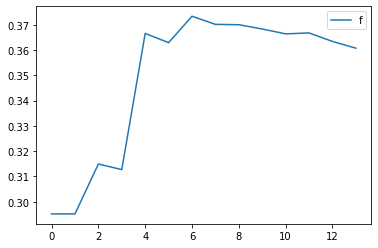

In [16]:
'''Hacemos un grafico sencillo para ver evaluar el resultado'''
plt.plot(result)
plt.legend("f1 Score")

**Conclusion**

El mejor arbol de decision se obtiene con una poda de 7, obteniendose un f1 score de 0.373 (promedio de cross validation con 5 folds) 

# 2- Random Forest

In [17]:
'''Utilizando la misma division que se uso para la Regresion por Arbol de decision'''

X_train
y_train

id
146790    2
142735    1
971       4
61341     1
153359    3
         ..
70247     2
44415     4
142189    3
62804     2
95312     1
Name: ClasePopularidad, Length: 55543, dtype: int64

In [18]:
'''Creamos el modelo'''

modelo_random_forest = RandomForestClassifier(n_estimators = 25,random_state = 13) 
modelo_random_forest.fit(X_train, y_train)

RandomForestClassifier(n_estimators=25, random_state=13)

In [19]:
#Se hace la prediccion
yPredForest = modelo_random_forest.predict(X_test)

In [20]:
#Evaluacion con Metricas

f1Forest = f1_score(y_test,yPredForest,average='weighted')
print(f'El F1 Score del modelo es de {f1Forest}')
print(classification_report(y_test,yPredForest))


confusion_matrixForest = pd.DataFrame(confusion_matrix(y_test, yPredForest))
confusion_matrixForest.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixForest.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixForest)

El F1 Score del modelo es de 0.3681208589632677
              precision    recall  f1-score   support

           1       0.40      0.45      0.43      4488
           2       0.37      0.47      0.42      4914
           3       0.36      0.26      0.30      3592
           4       0.41      0.04      0.08       904
           5       0.00      0.00      0.00        22

    accuracy                           0.38     13920
   macro avg       0.31      0.25      0.24     13920
weighted avg       0.38      0.38      0.37     13920

           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  2038                  1875              564   
MediaBaja             1751                  2310              837   
Media                 1020                  1606              940   
MediaAlta              245                   370              250   
Alta                     7                     7                7   

           Prediccion MediaAlta  Prediccion Alta

In [21]:
'''Similar al caso del Arbol, haremos un loop para calcular Accuracies a diferentes valore de n_estimator'''

import time   #Quiero ver tambien cuanto tiempo lleva el training segun el numero de estimadores
T = []
estimators = np.arange(10,150,10)
accuracyForest = []
resultForest = []

for i in estimators:
    inicio = time.process_time()
    modelo_random_forest = RandomForestClassifier(n_estimators = i,random_state = 13) 
    modelo_random_forest.fit(X_train, y_train)
    yPredForest = modelo_random_forest.predict(X_test)
    fin = time.process_time()
    t = fin-inicio
    T.append(t)
    print(t)
    
    
    a= accuracy_score(y_test,yPredForest)
    f = f1_score(y_test,yPredForest,average='weighted')  
    accuracyForest.append(a)
    resultForest.append(f)

resultForest



1.731155000000001
3.475766
5.446107999999995
6.801648999999998
8.73829
10.191916999999997
11.904310999999993
13.642895999999993
15.293680999999992
17.005838999999995
18.61244400000001
20.307965999999993
22.395636999999994
23.738135


[0.35115444066556517,
 0.36631207364250223,
 0.37096937238672034,
 0.3739037721944593,
 0.3767617273588889,
 0.37775162267637946,
 0.3773590723080221,
 0.37966411665943506,
 0.38263621214533333,
 0.3835840821116356,
 0.38424624817475106,
 0.3847214036245894,
 0.3857234972890265,
 0.38367552915345743]

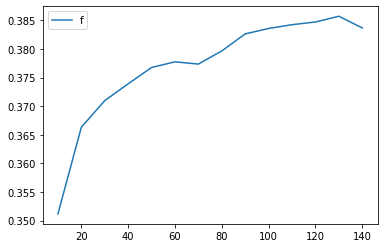

In [23]:
'''Hacemos un grafico sencillo para ver evaluar el resultado'''
plt.plot(estimators, resultForest)
plt.legend("f1 Score")

**Conclusion**

Se obtiene el mejor resultado conun Random Forest con 130 n_estimators, dando un resultado de f1 = 0.386

## Dummy Classifier

In [25]:
moda = test['ClasePopularidad'].mode()[0]
y_Dummy = test['ClasePopularidad'].apply(lambda x: moda)
y_Dummy

id
116295    2
101223    2
47928     2
88722     2
111363    2
         ..
159895    2
37399     2
139733    2
136482    2
103656    2
Name: ClasePopularidad, Length: 13920, dtype: int64

In [26]:
f1Dummy= f1_score(y_test,y_Dummy,average='weighted')
print(f'El F1 Score del Modelo mas facil es {f1Dummy}')

El F1 Score del Modelo mas facil es 0.18421224637760766


## Resumen

In [27]:
#Table Resumen

Resumen = pd.DataFrame([[0.373,'poda = 7'],[0.386,'estimadores = 130'],[0.184,'no aplica']],index = ['Arbol','Random Forest','Dummy'], columns = ['Score','Parametro'])

In [28]:
Resumen

,Score,Parametro
Arbol,0.373,poda = 7
Random Forest,0.386,estimadores = 130
Dummy,0.184,no aplica


## Algoritmos de Clasificacion con Balanceo de Clases - SMOTE

In [29]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [30]:
from collections import Counter
counter = Counter(y_train)
counter

Counter({2: 19894, 1: 17771, 4: 3635, 3: 14161, 5: 82})

Como se ve, las clases 4 y 5 (popularidades media/alta y alta) tienen muy pocos datos, entonces aplicamos SMOTE para balancear

In [31]:
'''Para Balancear los datos, se utilizara el metodo SMOTE
donde se busca repetir datos de las clases minoritarias para aumentar su proporcion'''


from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=13)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [32]:
'''Verificamos el balanceo'''
counter = Counter(y_res)
print(counter)

Counter({2: 19894, 1: 19894, 4: 19894, 3: 19894, 5: 19894})


Ahora repetiremos los entrenamientos con este nuevo train set balanceado

## Arbol de Decision con SMOTE

In [33]:
'''Creamos el modelo'''

kfold = StratifiedKFold(n_splits=5,shuffle=True, random_state = 13)  #Agregaremos Cross-Validation para este metodo

modelArbol= tree.DecisionTreeClassifier(random_state = 13) 

modelArbol.fit(X_res, y_res) 

CV_scores = cross_val_score(modelArbol, X_res, y_res, cv=kfold, scoring = "f1_weighted")

print(f'Cross validation score es  {CV_scores.mean()}')

Cross validation score es  0.5313820123191112


## Random Forest con SMOTE

In [34]:
'''Creamos el modelo'''

modelo_random_forest = RandomForestClassifier(n_estimators = 25,random_state = 13) 
modelo_random_forest.fit(X_res, y_res)

#Se hace la prediccion
yPredForest = modelo_random_forest.predict(X_test)

In [35]:
#Evaluacion con Metricas

f1Forest = f1_score(y_test,yPredForest,average='weighted')
 
print(classification_report(y_test,yPredForest))


confusion_matrixForest = pd.DataFrame(confusion_matrix(y_test, yPredForest))
confusion_matrixForest.index = ['Baja','MediaBaja','Media','MediaAlta','Alta']
confusion_matrixForest.columns = ['Prediccion Baja','Prediccion MediaBaja','PrediccionMeida','Prediccion MediaAlta','Prediccion Alta']

print(confusion_matrixForest)

El F1 Score del modelo es de 0.36651919395005683
              precision    recall  f1-score   support

           1       0.42      0.44      0.43      4488
           2       0.40      0.36      0.38      4914
           3       0.33      0.31      0.32      3592
           4       0.13      0.20      0.16       904
           5       0.08      0.05      0.06        22

    accuracy                           0.36     13920
   macro avg       0.27      0.27      0.27     13920
weighted avg       0.37      0.36      0.37     13920

           Prediccion Baja  Prediccion MediaBaja  PrediccionMeida  \
Baja                  1985                  1354              820   
MediaBaja             1618                  1778             1119   
Media                  912                  1122             1126   
MediaAlta              208                   221              292   
Alta                     9                     3                6   

           Prediccion MediaAlta  Prediccion Alt